## DTW Quickstart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: >

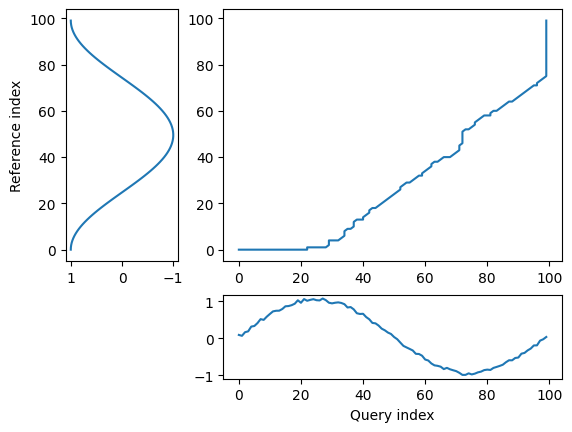

In [2]:
idx = np.linspace(0, 6.28, num=100)
query = np.sin(idx) + np.random.uniform(size=100) / 10.0

template = np.cos(idx)
alignment = dtw(query, template, keep_internals=True)

alignment.plot(type="threeway")

### DTW for time series in pose estimation

In [3]:
def group_dataframe(
    df: pd.DataFrame, group_column: str, columns_to_kepp: list[str]
) -> np.ndarray:
    df_groups = df.groupby(group_column)

    reference_data = []
    for _, group in df_groups:
        reference_data.append(group[columns_to_kepp].to_numpy())

    return np.array(reference_data)

In [4]:
import pandas as pd

POSITION_COLUMNS = ["x", "y", "z"]

reference_video_joints_df = pd.read_csv("../results/reference_squat/joints.csv")
reference_video_joints_df.head()

,frame,x,y,z,visibility,joint_id
0,0,0.144358,-0.472796,-0.015095,0.999907,11
1,0,-0.148776,-0.481989,-0.136078,0.999985,12
2,0,0.217394,-0.293394,-0.111993,0.964206,13
3,0,-0.271390,-0.270867,-0.233686,0.996534,14
4,0,0.263808,-0.447081,-0.337177,0.983496,15


In [5]:
reference_data = group_dataframe(
    reference_video_joints_df, group_column="frame", columns_to_kepp=POSITION_COLUMNS
)

In [6]:
query_video_joints_df = pd.read_csv("../results/query_squat/joints.csv")
query_video_joints_df.head()

,frame,x,y,z,visibility,joint_id
0,0,0.270567,-0.404950,-0.068237,0.999771,11
1,0,0.067789,-0.396084,-0.347861,0.999888,12
2,0,0.361893,-0.218562,0.019094,0.884555,13
3,0,0.071044,-0.144514,-0.360021,0.992676,14
4,0,0.557464,-0.072485,-0.034318,0.957719,15


In [7]:
query_data = group_dataframe(
    query_video_joints_df, group_column="frame", columns_to_kepp=POSITION_COLUMNS
)

Both datasets are now filtered and grouped. Let's assume only importance on one of the knees (right in this case).

In [8]:
reference_data_right_knee = reference_data[:, 9, :]
query_data_right_knee = query_data[:, 9, :]

Mapped frames from query to reference: [ 0  0  0  0  0  0  0  1  2  3  4  4  4  4  4  4  4  4  5  6  6  7  8  9
 10 11 12 13 14 14 15 15 16 16 16 16 16 17 18 18 18 19 20 21 22 23]


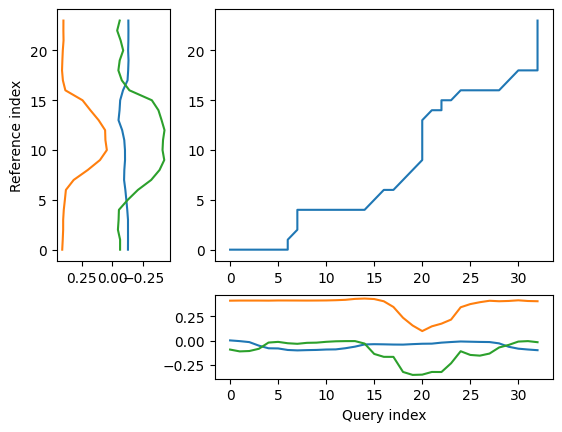

In [19]:
alignment = dtw(query_data_right_knee, reference_data_right_knee, keep_internals=True)
alignment.plot(type="threeway")
print(f"Mapped frames from query to reference: {alignment.index2s}")

Let's visualize that in 3D (Unfortunetly `dtw-python` allows only one dimention data for threeway plotting).

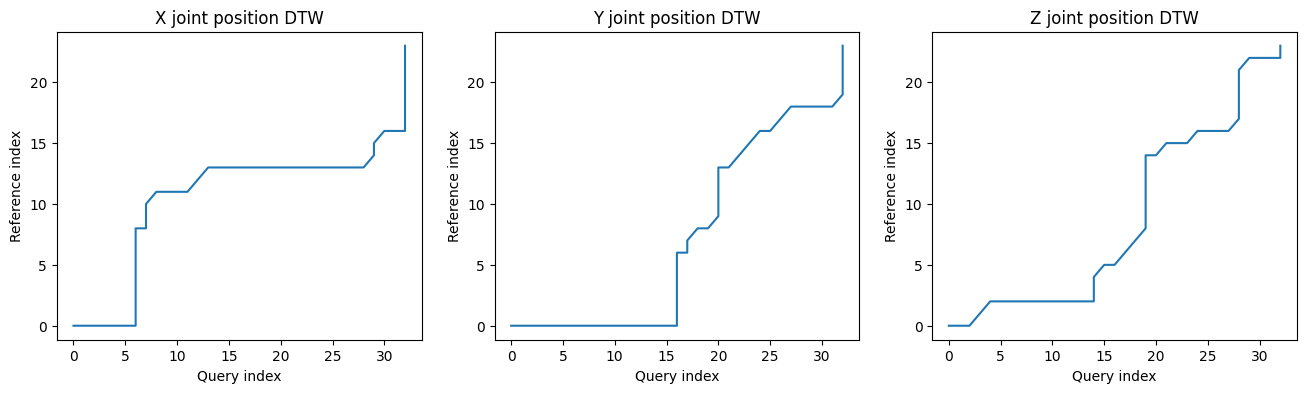

In [10]:
joints_positions = ["X", "Y", "Z"]

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for idx, axis in enumerate(axes):
    reference = reference_data[:, 9, idx]
    query = query_data[:, 9, idx]
    alignment = dtw(query, reference)
    axis.plot(alignment.index1, alignment.index2)
    axis.set_title(f"{joints_positions[idx]} joint position DTW")
    axis.set_xlabel("Query index")
    axis.set_ylabel("Reference index")

<Axes: xlabel='Index', ylabel='Query value'>

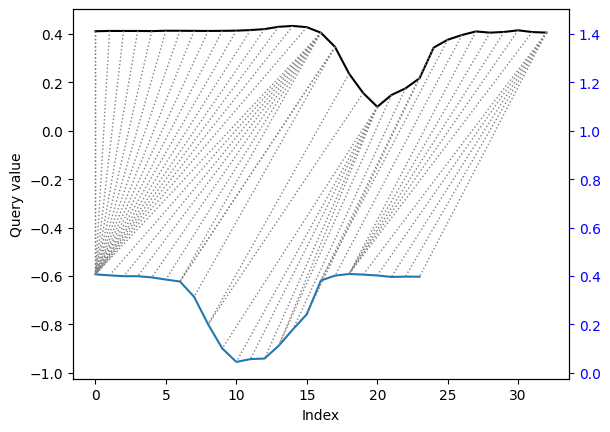

In [14]:
dtw(
    query_data_right_knee[:, 1], reference_data_right_knee[:, 1], keep_internals=True
).plot(type="twoway", offset=-1)